# Plot SAM index graphs

In [21]:
import xarray as xr, matplotlib.pyplot as plt
from importlib import reload # need to use this if I edit a function file
import os
import numpy as np
import pandas as pd
import cartopy.crs as ccrs # to add in continents and change map projections 
from matplotlib.colors import LinearSegmentedColormap # to change colour bar????
import dask.diagnostics # dask allows you to check how long something is taking to load
import climtas # needed to count event statistics with a specified duration
import scipy # to calculate correlation

In [4]:
# import custom functions
import sys 
sys.path.append('/home/563/kb6999/Functions') # use this if the function file is in a different directory to the notebook

import frequently_used_functions as func
import plotting_functions as fplot
import model_functions as funcM
import reanalysis_functions as funcR

In [5]:
# read in netcdf of monthly pressure
R_SAM = xr.open_dataset('R_SAM_index.nc')
R_SAM

<xarray.Dataset>
Dimensions:  (time: 2160)
Coordinates:
  * time     (time) datetime64[ns] 1836-01-31 1836-02-29 ... 2015-12-31
    month    (time) int64 ...
Data variables:
    prmsl    (time) float64 ...

In [6]:
# read in netcdf of monthly pressure
SAM_abram = xr.open_dataset('SAM_data_abram_1850_2007.nc')
SAM_abram

<xarray.Dataset>
Dimensions:                    (time: 158)
Coordinates:
  * time                       (time) datetime64[ns] 1850-01-01 ... 2007-01-01
Data variables:
    SAM_Index                  (time) float64 ...
    SAM_Index_err              (time) float64 ...
    RE                         (time) float64 ...
    RE_crit                    (time) float64 ...
    SAM_Index_70yloess         (time) float64 ...
    SAM_Index_+error_70yloess  (time) float64 ...
    SAM_Index_-error_70yloess  (time) float64 ...
    Marshall_SAM_Index         (time) float64 ...

## caluclate correlation

In [86]:
# compare abram and 20cr
start_date, end_date = '1850','2007'

# choose 20CR data (resampled to yearly) and abram data 
ds = R_SAM.prmsl.sel(time=slice(start_date, end_date)).resample(time='YS').mean(dim='time')
ds2 = SAM_abram.SAM_Index.sel(time=slice(start_date, end_date))

# calculate the correlation coefficient using different methods for the largest crossover time period
print(scipy.stats.pearsonr(ds, ds2))#[0]    # Pearson's r

(0.4097032008972624, 9.014883857793854e-08)


In [87]:
# compare abram and 20cr
start_date, end_date = '1957','2007'

# choose 20CR data (resampled to yearly) and abram data 
ds = R_SAM.prmsl.sel(time=slice(start_date, end_date)).resample(time='YS').mean(dim='time')
ds2 = SAM_abram.SAM_Index.sel(time=slice(start_date, end_date))

# calculate the correlation coefficient using different methods for the largest crossover time period
print(scipy.stats.pearsonr(ds, ds2))#[0]    # Pearson's r

(0.7223356554800898, 2.1853513338136646e-09)


In [88]:
# compare marshall and 20cr
start_date, end_date = '1957','2007'

# choose 20CR data (resampled to yearly) and abram data 
ds = R_SAM.prmsl.sel(time=slice(start_date, end_date)).resample(time='YS').mean(dim='time')
ds2 = SAM_abram.Marshall_SAM_Index.sel(time=slice(start_date, end_date))

# calculate the correlation coefficient using different methods for the largest crossover time period
print(scipy.stats.pearsonr(ds, ds2))#[0]    # Pearson's r

(0.8146346309352782, 3.5195025972076354e-13)


# figures

In [7]:
# set the default font size
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [8]:
e_date = ['1883-08-27']

Negative SAM: westerly winds further north than usual.  This brings more precipitation to southwest and southeast in winter and less precipitation in parts of the east, so it is likely to be wetter in Victoria, but dry in New South Wales. There is also an increased chance of snow in alpine areas.  In summer, a negative SAM causes a decreased likelihood of precipitation in the southeast and east and a greater chance of spring heatwaves in sourthern australia.  Th
In EL Ninos SAM tends to be more negative particularly in spring and summer. This enhances El Nino signals.    

(citation: http://www.bom.gov.au/climate/sam/#tabs=What-is-SAM%3F) 

In [58]:
fplot=reload(fplot)

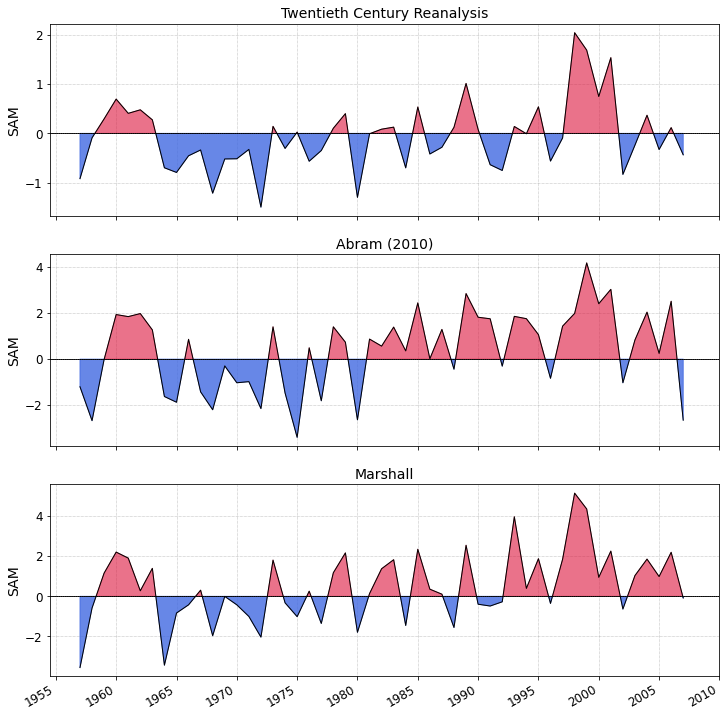

In [84]:
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(12,12))

start_date, end_date = '1957','2007'
ds = R_SAM.prmsl.sel(time=slice(start_date, end_date)).resample(time='YS').mean(dim='time')
fplot.SAM_plot(ds, ax = axes[0])

ds1 = SAM_abram.SAM_Index.sel(time=slice(start_date, end_date))
fplot.SAM_plot(ds1, ax = axes[1])

ds2 = SAM_abram.Marshall_SAM_Index.sel(time=slice(start_date, end_date))
fplot.SAM_plot(ds2, ax = axes[2])

#set the frequency of the xticks 
years = pd.date_range(pd.to_datetime(start_date)-2* pd.offsets.YearBegin(), 
                      pd.to_datetime(end_date)+3* pd.offsets.YearBegin(), freq='5YS')
axes[0].set_xticks(years.values)
axes[0].set_xticklabels(years.year) # .year shows only the year (not month)

# set axis titles
axes[0].set(title = 'Twentieth Century Reanalysis')
axes[1].set(title = 'Abram (2010)')
axes[2].set(title = 'Marshall')

plt.savefig('R_timeseries_year_SAM_compare.png', dpi=300, bbox_inches='tight')

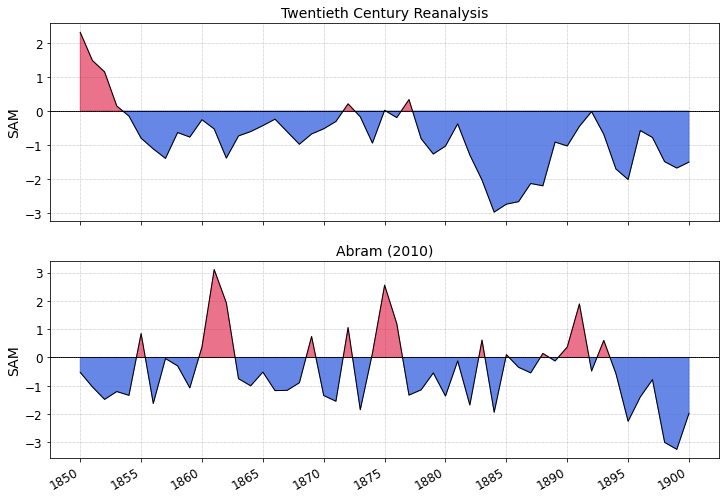

In [85]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(12,8))

start_date, end_date = '1850-01','1900-01'
ds = R_SAM.prmsl.sel(time=slice(start_date, end_date)).resample(time='YS').mean(dim='time')
fplot.SAM_plot(ds, ax = axes[0])

ds1 = SAM_abram.SAM_Index.sel(time=slice(start_date, end_date))
fplot.SAM_plot(ds1, ax = axes[1])

#set the frequency of the xticks 
years = pd.date_range(pd.to_datetime(start_date), pd.to_datetime(end_date), freq='5YS')
axes[0].set_xticks(years.values)
axes[0].set_xticklabels(years.year) # .year shows only the year (not month)

# set axis titles
axes[0].set(title = 'Twentieth Century Reanalysis')
axes[1].set(title = 'Abram (2010)')

plt.savefig('R_timeseries_year_SAM_abram+20CR.png', dpi=300, bbox_inches='tight')

[Text(-5479.0, 0, '1955'),
 Text(-3653.0, 0, '1960'),
 Text(-1826.0, 0, '1965'),
 Text(0.0, 0, '1970'),
 Text(1826.0, 0, '1975'),
 Text(3652.0, 0, '1980'),
 Text(5479.0, 0, '1985'),
 Text(7305.0, 0, '1990'),
 Text(9131.0, 0, '1995'),
 Text(10957.0, 0, '2000'),
 Text(12784.0, 0, '2005'),
 Text(14610.0, 0, '2010'),
 Text(16436.0, 0, '2015')]

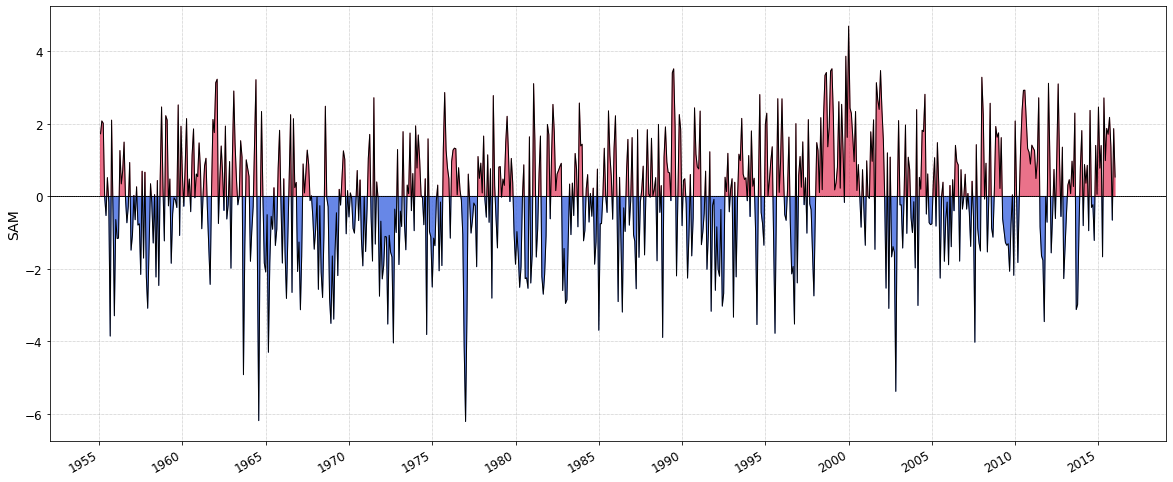

In [10]:
fig, axes = plt.subplots(1, 1, figsize=(20,8))

start_date, end_date = '1955','2015'
ds = R_SAM.prmsl.sel(time=slice(start_date, end_date))
fplot.SAM_plot(ds, ax = axes)

#set the frequency of the xticks 
years = pd.date_range(pd.to_datetime(start_date), pd.to_datetime(end_date), freq='5YS')
axes.set_xticks(years.values)
axes.set_xticklabels(years.year) # .year shows only the year (not month)

# plt.savefig('R_timeseries_mon_SAM_compare.png', dpi=300, bbox_inches='tight')

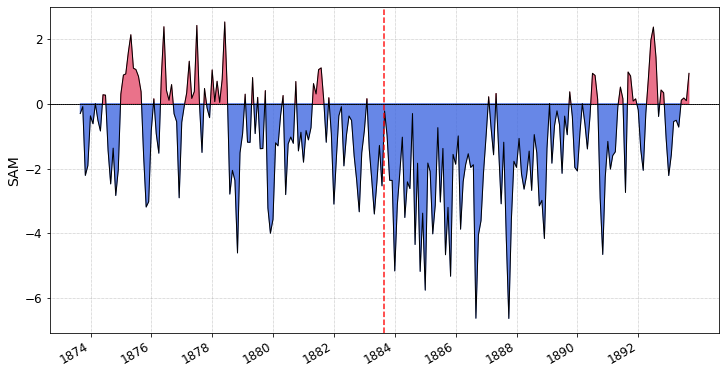

In [12]:
fig, axes = plt.subplots(1, 1, figsize=(12,6))

# select the dataset and years to plot
start_date, end_date = '1873-08','1893-08'
ds = R_SAM.prmsl.sel(time=slice(start_date, end_date))

# plot the SAM index
fplot.SAM_plot(ds, ax = axes, e_date=e_date)

#set the frequency of the xticks 
years = pd.date_range(pd.to_datetime(start_date), pd.to_datetime(end_date), freq='2YS')
axes.set_xticks(years.values)
axes.set_xticklabels(years.year) # .year shows only the year (not month)

plt.savefig('R_K_timeseries_mon_SAM.png', dpi=300, bbox_inches='tight')

Negative SAM: westerly winds further north than usual.  This brings more precipitation to southwest and southeast in winter and less precipitation in parts of the east, so it is likely to be wetter in Victoria, but dry in New South Wales. There is also an increased chance of snow in alpine areas.  In summer, a negative SAM causes a decreased likelihood of precipitation in the southeast and east and a greater chance of spring heatwaves in sourthern australia.  Th
In EL Ninos SAM tends to be more negative particularly in spring and summer. This enhances El Nino signals.    

(citation: http://www.bom.gov.au/climate/sam/#tabs=What-is-SAM%3F) 

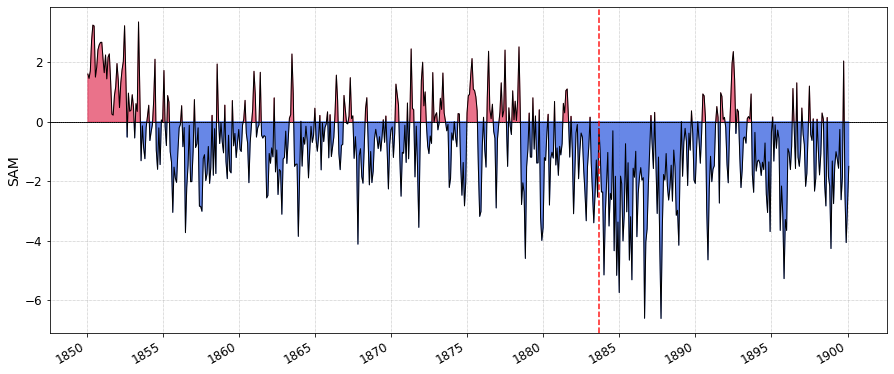

In [14]:
fig, axes = plt.subplots(1, 1, figsize=(15,6))

# select the dataset and years to plot
start_date, end_date = '1850-01','1900-01'
ds = R_SAM.prmsl.sel(time=slice(start_date, end_date))

# plot the SAM index
fplot.SAM_plot(ds, ax = axes, e_date=e_date)

#set the frequency of the xticks 
years = pd.date_range(pd.to_datetime(start_date), pd.to_datetime(end_date), freq='5YS')
axes.set_xticks(years.values)
axes.set_xticklabels(years.year) # .year shows only the year (not month)

plt.savefig('R_timeseries_mon_SAM.png', dpi=300, bbox_inches='tight')

## abram index

[Text(-5479.0, 0, '1955'),
 Text(-3653.0, 0, '1960'),
 Text(-1826.0, 0, '1965'),
 Text(0.0, 0, '1970'),
 Text(1826.0, 0, '1975'),
 Text(3652.0, 0, '1980'),
 Text(5479.0, 0, '1985'),
 Text(7305.0, 0, '1990'),
 Text(9131.0, 0, '1995'),
 Text(10957.0, 0, '2000'),
 Text(12784.0, 0, '2005')]

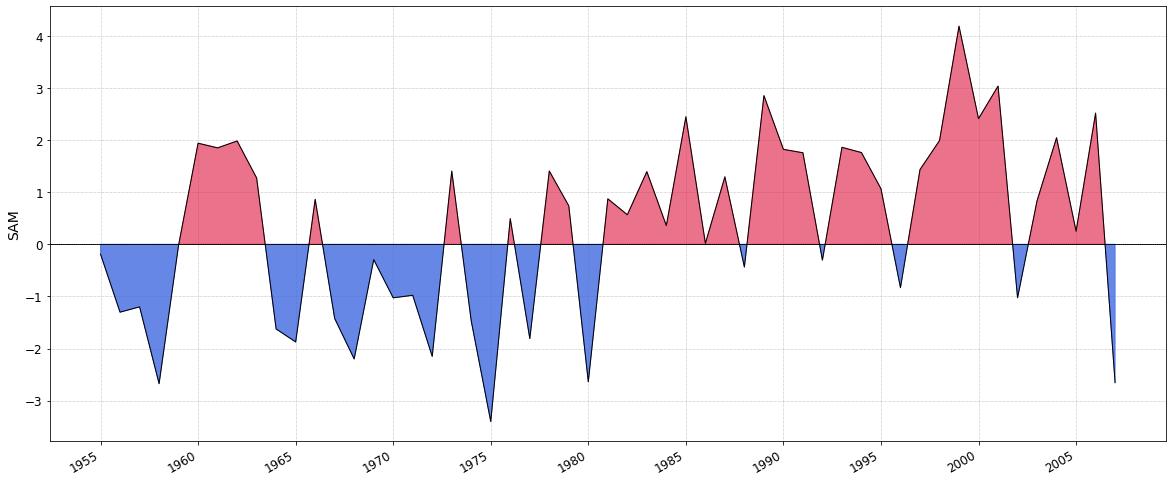

In [16]:
fig, axes = plt.subplots(1, 1, figsize=(20,8))

# select the dataset and years to plot
start_date, end_date = '1955','2007'
ds = SAM_abram.SAM_Index.sel(time=slice(start_date, end_date))

# plot the SAM index
fplot.SAM_plot(ds, ax = axes)

#set the frequency of the xticks 
years = pd.date_range(pd.to_datetime(start_date), pd.to_datetime(end_date), freq='5YS')
axes.set_xticks(years.values)
axes.set_xticklabels(years.year) # .year shows only the year (not month)

# plt.savefig('R_timeseries_mon_SAM_compare.png', dpi=300, bbox_inches='tight')

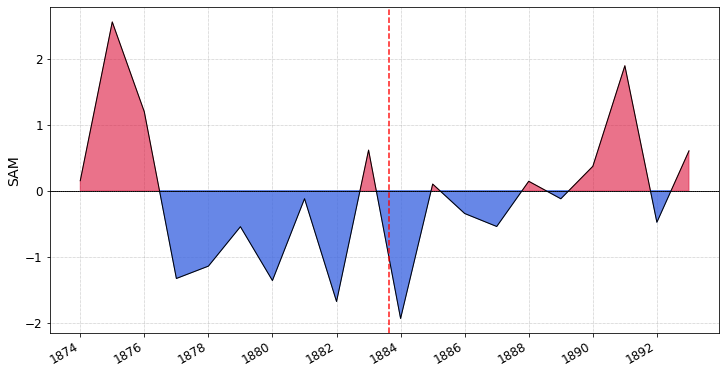

In [17]:
fig, axes = plt.subplots(1, 1, figsize=(12,6))

# select the dataset and years to plot
start_date, end_date = '1873-08','1893-08'
ds = SAM_abram.SAM_Index.sel(time=slice(start_date, end_date))

# plot the SAM index
fplot.SAM_plot(ds, ax = axes, e_date=e_date)

#set the frequency of the xticks 
years = pd.date_range(pd.to_datetime(start_date), pd.to_datetime(end_date), freq='2YS')
axes.set_xticks(years.values)
axes.set_xticklabels(years.year) # .year shows only the year (not month)

plt.savefig('R_K_timeseries_SAM_Abram.png', dpi=300, bbox_inches='tight')

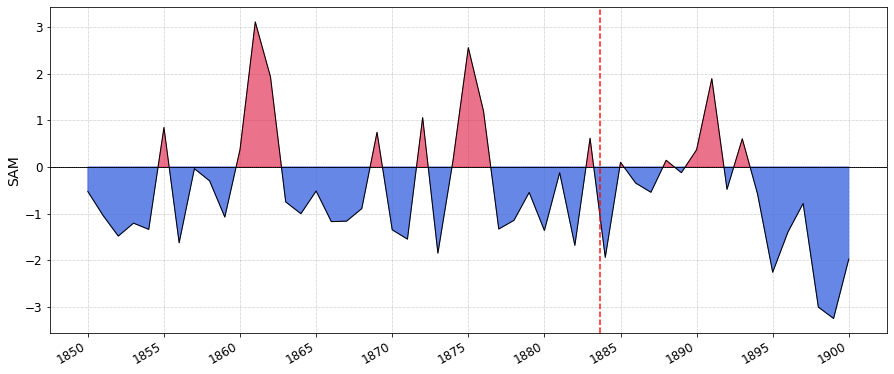

In [18]:
fig, axes = plt.subplots(1, 1, figsize=(15,6))

# select the dataset and years to plot
start_date, end_date = '1850-01','1900-01'
ds = SAM_abram.SAM_Index.sel(time=slice(start_date, end_date))

# plot the SAM index
fplot.SAM_plot(ds, ax = axes, e_date=e_date)

#set the frequency of the xticks 
years = pd.date_range(pd.to_datetime(start_date), pd.to_datetime(end_date), freq='5YS')
axes.set_xticks(years.values)
axes.set_xticklabels(years.year) # .year shows only the year (not month)

plt.savefig('R_timeseries_SAM_Abram.png', dpi=300, bbox_inches='tight')